# Practice Exercise Linear Regression

## We will be using the Boston house price dataset for this exercise.
#### This dataset is in-built in Python in the Sci-kit learn library. But for this exercise, we have already downloaded this dataset in the form of a csv file.

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [3]:
df = pd.read_csv('Boston.csv')

**Check the data description**

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Check the shape of the dataset**

In [5]:
df.shape

(506, 14)

**Get the info data types column wise**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Get the summary statistics of the dataset**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Get the Correlation Heatmap**

<AxesSubplot:>

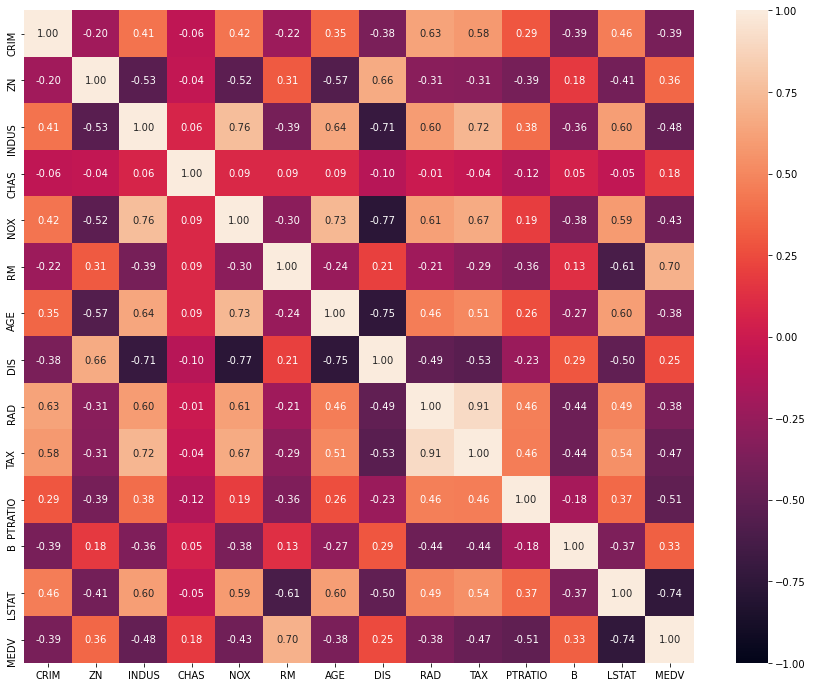

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f',)

**Split the dataset**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.iloc[:,0:13]
y=df['MEDV']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Using Statsmodels OLS

In [19]:
import statsmodels.formula.api as sm

**Make the linear model using OLS**

In [20]:
data_train = pd.concat([X_train, y_train], axis=1)

In [21]:
formula = 'MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'
lm1 = sm.ols(formula = formula, data=data_train).fit()

**Get the value of coefficient of determination**

In [22]:
lm1.params

Intercept    46.396494
CRIM         -0.098542
ZN            0.060784
INDUS         0.059172
CHAS          2.439560
NOX         -21.469965
RM            2.795814
AGE           0.003575
DIS          -1.516272
RAD           0.307542
TAX          -0.011280
PTRATIO      -1.005466
B             0.006450
LSTAT        -0.568835
dtype: float64

In [23]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     64.15
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           3.56e-83
Time:                        13:19:10   Log-Likelihood:                -1061.2
No. Observations:                 354   AIC:                             2150.
Df Residuals:                     340   BIC:                             2205.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3965      6.361      7.294      0.000      33.884      58.909
CRIM          -0.0985      0.044     -2.259      0.025      -0.184      -0.013
ZN             0.0608      0.019      3.279      0.001       0.024       0.097
INDUS          0.0592      0.077      0.770      0.442      -0.092       0.210
CHAS           2.4396      0.981      2.488      0.013       0.511       4.368
NOX          -21.4700      4.697     -4.571      0.000     -30.708     -12.232
RM             2.7958      0.521      5.364      0.000       1.771       3.821
AGE            0.0036      0.017      0.216      0.829      -0.029       0.036
DIS           -1.5163      0.257     -5.892      0.000      -2.022      -1.010
RAD            0.3075      0.087      3.553      0.000       0.137       0.478
TAX           -0.0113      0.005     -2.283      0.023      -0.021      -0.002
PTRATIO       -1.0055      0.171     -5.873      0.000      -1.342      -0.669
B              0.0065      0.003      1.881      0.061      -0.000       0.013
LSTAT         -0.5688      0.062     -9.190      0.000      -0.691      -0.447
==============================================================================
Omnibus:                      136.364   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.275
Skew:                           1.642   Prob(JB):                    2.95e-123
Kurtosis:                       8.241   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
round(lm1.rsquared*100,2)

71.04

**Get the Predictions on test set**

In [28]:
y_pred = lm1.predict(X_test)
y_pred

307    32.391465
343    27.944013
47     17.837628
67     21.669414
362    18.936396
         ...    
467    17.329959
95     28.360234
122    20.794228
260    33.698157
23     13.518827
Length: 152, dtype: float64

**Calculate MSE for training set**

In [30]:
np.mean((lm1.predict(X_train)-y_train)**2)

23.51333444932701

**Get the RMSE on training set**

In [31]:
np.sqrt(np.mean((lm1.predict(X_train)-y_train)**2))

4.849055005805463

**Get the RMSE on test set**

In [33]:
np.sqrt(np.mean((y_pred-y_test)**2))

4.453237437198133

## Using Linear Model from Sci-kit learn library

**Fit the model to the training set**

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

**Get the score on training set**

In [36]:
model.score(X_train,y_train)

0.7103879080674731

**Get the score on test set**

In [37]:
model.score(X_test,y_test)

0.78362953850763

**Get the RMSE on test set**

In [38]:
np.sqrt(np.mean((model.predict(X_test)-y_test)**2))

4.4532374371981405

**Check Multi-collinearity using VIF**

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [42]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

CRIM ---> 2.1003728199615224
ZN ---> 2.8440132669462637
INDUS ---> 14.485757706539308
CHAS ---> 1.1529518589418775
NOX ---> 73.89494652814788
RM ---> 77.94828304638538
AGE ---> 21.38685048994314
DIS ---> 14.6996523837492
RAD ---> 15.167724857920897
TAX ---> 61.227274009649456
PTRATIO ---> 85.02954731061801
B ---> 20.104942636229136
LSTAT ---> 11.102024772203526
